In [199]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier

In [259]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour :
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[: ,0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'x1', fontsize=18)
    plt.ylabel(r'x2', fontsize=18, rotation=0)
X, y = make_moons(n_samples =500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100,bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

<h3>Chapter 7 – 앙상블 학습과 랜덤 포레스트</h3>

>투표 기반 분류 -> 분류기의 상관관계 -> 배깅,랜덤 패치  
>랜덤 포레스트 -> 엑스트라 트리  
>부스팅 -> 아다부스트, 그레디언트 부스트  
>스태킹

앙상블 학습 – 여러 개의 예측기를 조화롭게 학습시켜 그 모델들의 예측 결과들을 이용한다면 더 정확한 예측 값을 구할 수 있다. 일반적으로 편향은 비슷하지만 분산은 줄어든다.

![Alt text](img/ensemble.png)

### 7.1 투표 기반 분류기
투표 기반 분류기 – 여러 개의 예측기의 평균 또는 최빈값을 이용하여 예측을 한다.
만약 p의 정확도를 가진 분류기가 n개 있다면 이 분류기의 정확도는 ${n}/{k} p^k (1-p)^{(n-k)}$ 이다.  
  
  
*단 이러한 가정은 모든 분류기가 독립적이어야 하고, 오차에 대해 상관관계가 없어야 한다.  
이를 위해 각기 다른 훈련 알고리즘을 사용하거나 다른 데이터로 훈련한다.  
  
투표 방식  
>직접 투표 – 가장 많이 분류된 클래스로 다수결 투표  
>간접 투표 – 개별 분류기의 예측을 평균 내어 확률이 가장 높은 클래스를 예측, 성능이 더 높음


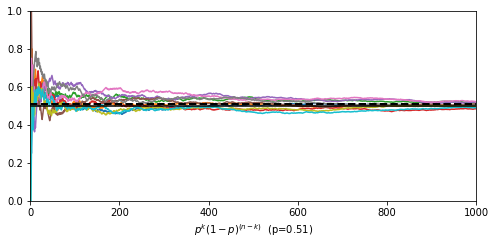

In [196]:
p = 0.51
coin_tosses = (np.random.rand(1000, 10) < p).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 1001).reshape(-1, 1)
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 1000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 1000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("$ p^k (1-p)^{(n-k)}$  (p=0.51)")
plt.axis([0, 1000, 0.0, 1.0])
plt.show()

### 7.2 배깅과 페이스팅  
오차에 대한 상관관계를 줄이기 위한 방법으로 훈련세트의 서브셋을 무작위로 구성하여 분류기를 각기 다르게 학습시키는 것이다.
  
배깅(bootstrap aggregating) – 훈련세트에서 중복을 허용하여 샘플링   
페이스팅 – 훈련세트에서 중복을 허용하지 않고 샘플링   


In [256]:
BaggingClassifier(bootstrap=True) #배깅
BaggingClassifier(bootstrap=False) #페이스팅

BaggingClassifier(base_estimator=None, bootstrap=False,
                  bootstrap_features=False, max_features=1.0, max_samples=1.0,
                  n_estimators=10, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

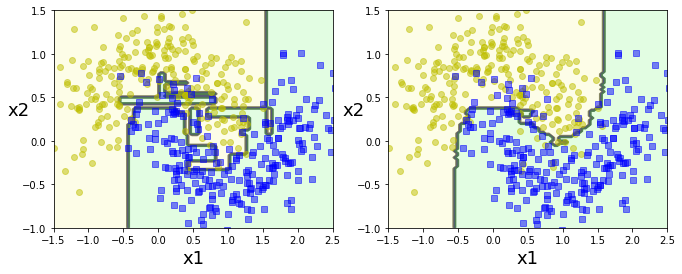

In [268]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.show()

    결정트리 - 배깅을 사용한 결정트리

#### 7.2.2 oob 평가  
배깅을 사용하여 샘플을 만들 경우 샘플의 37%가 남는다  
$$\lim{m\rightarrow\infty}{\left(1-\frac{1}{m}\right)^m}={1\ -\ e}^{-1}\approx0.63212 $$\*m개의 샘플에서 무작위로 추출할 경우  

이 남은 샘플을 이용하면 검증 세트나 교차 검증을 사용하지 않고 정확도를 평가할 수 있다.

### 7.3 랜덤 패치와 랜덤 서브 스페이스  
특성 샘플링 - 오차에 대한 상관관계를 줄이기 위하여 훈련셋의 특성을 무작위의 서브셋으로 구성한다.  
랜덤 패치 방식- 훈련 특성과 샘플을 모두 샘플링 하는 것   
랜덤 서브스페이스 방식 – 훈련 샘플을 모두 사용하고 특성은 샘플링 하는 것


### 7.4 랜덤 포레스트
랜덤 포레스트 – 배깅(페이스팅), 랜덤 특성 분할을 적용한 결정 트리의 앙상블  
엑스트라 트리 - 배깅(페이스팅), 랜덤 특성 분할,랜덤 분할을 적용한 결정 트리의 앙상블, 랜덤 포레스트 보다 속도가 빠르지만 일반화에 필요한 트리의 수가 늘어난다.  


### 7.4.2 특성 중요도
특성 중요도 – 결정 트리에서 평균적으로 불순도를 감소시키는 정도
(현재 노드의 샘플 비율 X 불순도) - (왼쪽 자식 노드의 샘플 비율 X 불순도)  -(오른쪽 자식 노드의 샘플 비율 X 불순도) 


### 7.5 부스팅  
부스팅 - 이전 예측기를 보완하는 새로운 예측기를 만드는 방법. 간단한 약분류기들이 상호보완 하도록 단계적으로 학습, 이들을 조합하여 최종 강분류기의 성능을 증폭시킨다.  

7.5.1  
아다부스트 – 전 예측기의 오차를 이용하여 샘플의 가중치를 수정하고 새로운 예측기를 학습시킨다.  
1. 각 샘플의 가중치를 1/m으로 두고 첫번째 약 분류기를 만든다.
2. 각 샘플의 가중치를 $w\gets\left\{\ w\ \left(\hat{y}=y\right)\ ,\ \ w\exp{\left(\alpha\right)}\left(\hat{y}\neq y\right)\right\}\ /\ \sum w\ \  $으로 두고 다음 분류기를 반복적으로 만든다.  
3. 예측  $ \hat{y}\left(x\right)=\begin{matrix}argmax\\k\\\end{matrix}\ \sum_{j-1,\hat{y}\left(x\right)=\ k}\alpha$  
*$ r = \sum_{j-1,\hat{y}\left(x\right)\neq y(x)} w/\ \sum_{j-1} w =에러율 , \alpha=\eta\log{\left(\frac{1-r}{r}\right)} = 예측기 가중치 ,  η = 학습률$

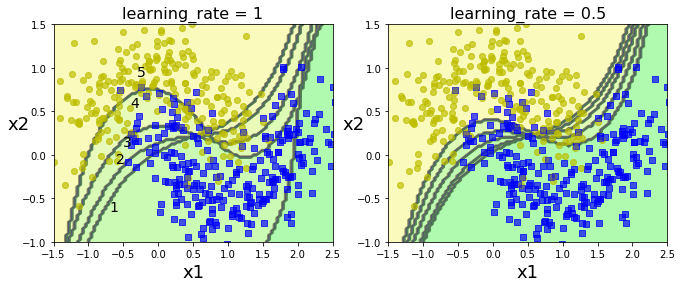

In [282]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R',learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
plt.figure(figsize=(11,4))
m = len(X_train)
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    if subplot == 121 :
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

#### 7.5.2
그래디언트 부스팅 - 전 예측기의 잔여 오차를 이용하여 새로운 예측기를 학습시킨다.
1. 첫번째 모델을 학습시킨다.
2. 잔여 오차에 대한 모델을 반복적으로 학습시킨다.
3. 예측 $\hat{y}\left(x\right)=sum\left(y(x)\right)$

![Alt text](img/gradient.png)

### 7.6 스태킹  
스태킹 – 앙상블 학습에서 각 모델의 예측값을 가지고 새로운 메타 모델을 학습시켜 최종 예측 모델을 만드는 방법  
1. 학습 데이터셋에서 샘플링을 통해 서브셋1(subset-1)을 만들고, 이 서브셋을 이용해 각 모델을 학습시킨다. 
2. 서브셋2(subset-2) 학습 시킨 모델을 이용해 각 모델의 예측값을 출력하고 예측값들을 합친다.
3. 합쳐진 예측값들을 입력 특성(input feature)로 사용하는 새로운 모델(meta learner, blender)을 학습시킨다.


![file](img/stacking.png)